# Image processing: Bacteria growth


The goal is to calculate the doubling time of the E. Coli bacteria. The doubling time is the time it takes for a bacteria culture to double its size.

The early growth phase of a bacterial culture can be stated mathematically as:

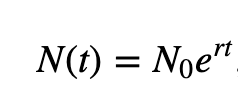

where  N(t)  is the number of cells at time  t ,  N0  is the initial number of cells and  r  is the growth rate in dimensions of time.

We will use a a series of images E. coli cells growing on a hard agar subtstrate at 100x magnification taken at 5 minutes intervals.


First we import the libraries

In [42]:
import glob
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

The file 'images_barcteria' images coming from 2 different capturing techniques, capturing the fluorescence of different proteins.

We will use the TRITC files.

First we will load the TRITC files using glob into a variable called files:

In [10]:
#Load the TRITC files using glob into the variable  files
files = glob.glob('images_barcteria/*TRITC*.tif')

In [11]:
len(files)

30

In [12]:
files

['images_barcteria/img_000000004_TRITC_000.tif',
 'images_barcteria/img_000000013_TRITC_000.tif',
 'images_barcteria/img_000000017_TRITC_000.tif',
 'images_barcteria/img_000000000_TRITC_000.tif',
 'images_barcteria/img_000000010_TRITC_000.tif',
 'images_barcteria/img_000000007_TRITC_000.tif',
 'images_barcteria/img_000000029_TRITC_000.tif',
 'images_barcteria/img_000000003_TRITC_000.tif',
 'images_barcteria/img_000000014_TRITC_000.tif',
 'images_barcteria/img_000000009_TRITC_000.tif',
 'images_barcteria/img_000000027_TRITC_000.tif',
 'images_barcteria/img_000000023_TRITC_000.tif',
 'images_barcteria/img_000000024_TRITC_000.tif',
 'images_barcteria/img_000000019_TRITC_000.tif',
 'images_barcteria/img_000000020_TRITC_000.tif',
 'images_barcteria/img_000000021_TRITC_000.tif',
 'images_barcteria/img_000000018_TRITC_000.tif',
 'images_barcteria/img_000000025_TRITC_000.tif',
 'images_barcteria/img_000000022_TRITC_000.tif',
 'images_barcteria/img_000000026_TRITC_000.tif',
 'images_barcteria/i


Files are not sorted, so let's do it:

In [14]:
files.sort()
files

['images_barcteria/img_000000000_TRITC_000.tif',
 'images_barcteria/img_000000001_TRITC_000.tif',
 'images_barcteria/img_000000002_TRITC_000.tif',
 'images_barcteria/img_000000003_TRITC_000.tif',
 'images_barcteria/img_000000004_TRITC_000.tif',
 'images_barcteria/img_000000005_TRITC_000.tif',
 'images_barcteria/img_000000006_TRITC_000.tif',
 'images_barcteria/img_000000007_TRITC_000.tif',
 'images_barcteria/img_000000008_TRITC_000.tif',
 'images_barcteria/img_000000009_TRITC_000.tif',
 'images_barcteria/img_000000010_TRITC_000.tif',
 'images_barcteria/img_000000011_TRITC_000.tif',
 'images_barcteria/img_000000012_TRITC_000.tif',
 'images_barcteria/img_000000013_TRITC_000.tif',
 'images_barcteria/img_000000014_TRITC_000.tif',
 'images_barcteria/img_000000015_TRITC_000.tif',
 'images_barcteria/img_000000016_TRITC_000.tif',
 'images_barcteria/img_000000017_TRITC_000.tif',
 'images_barcteria/img_000000018_TRITC_000.tif',
 'images_barcteria/img_000000019_TRITC_000.tif',
 'images_barcteria/i

We have 30 images, let's see them all in a  grid

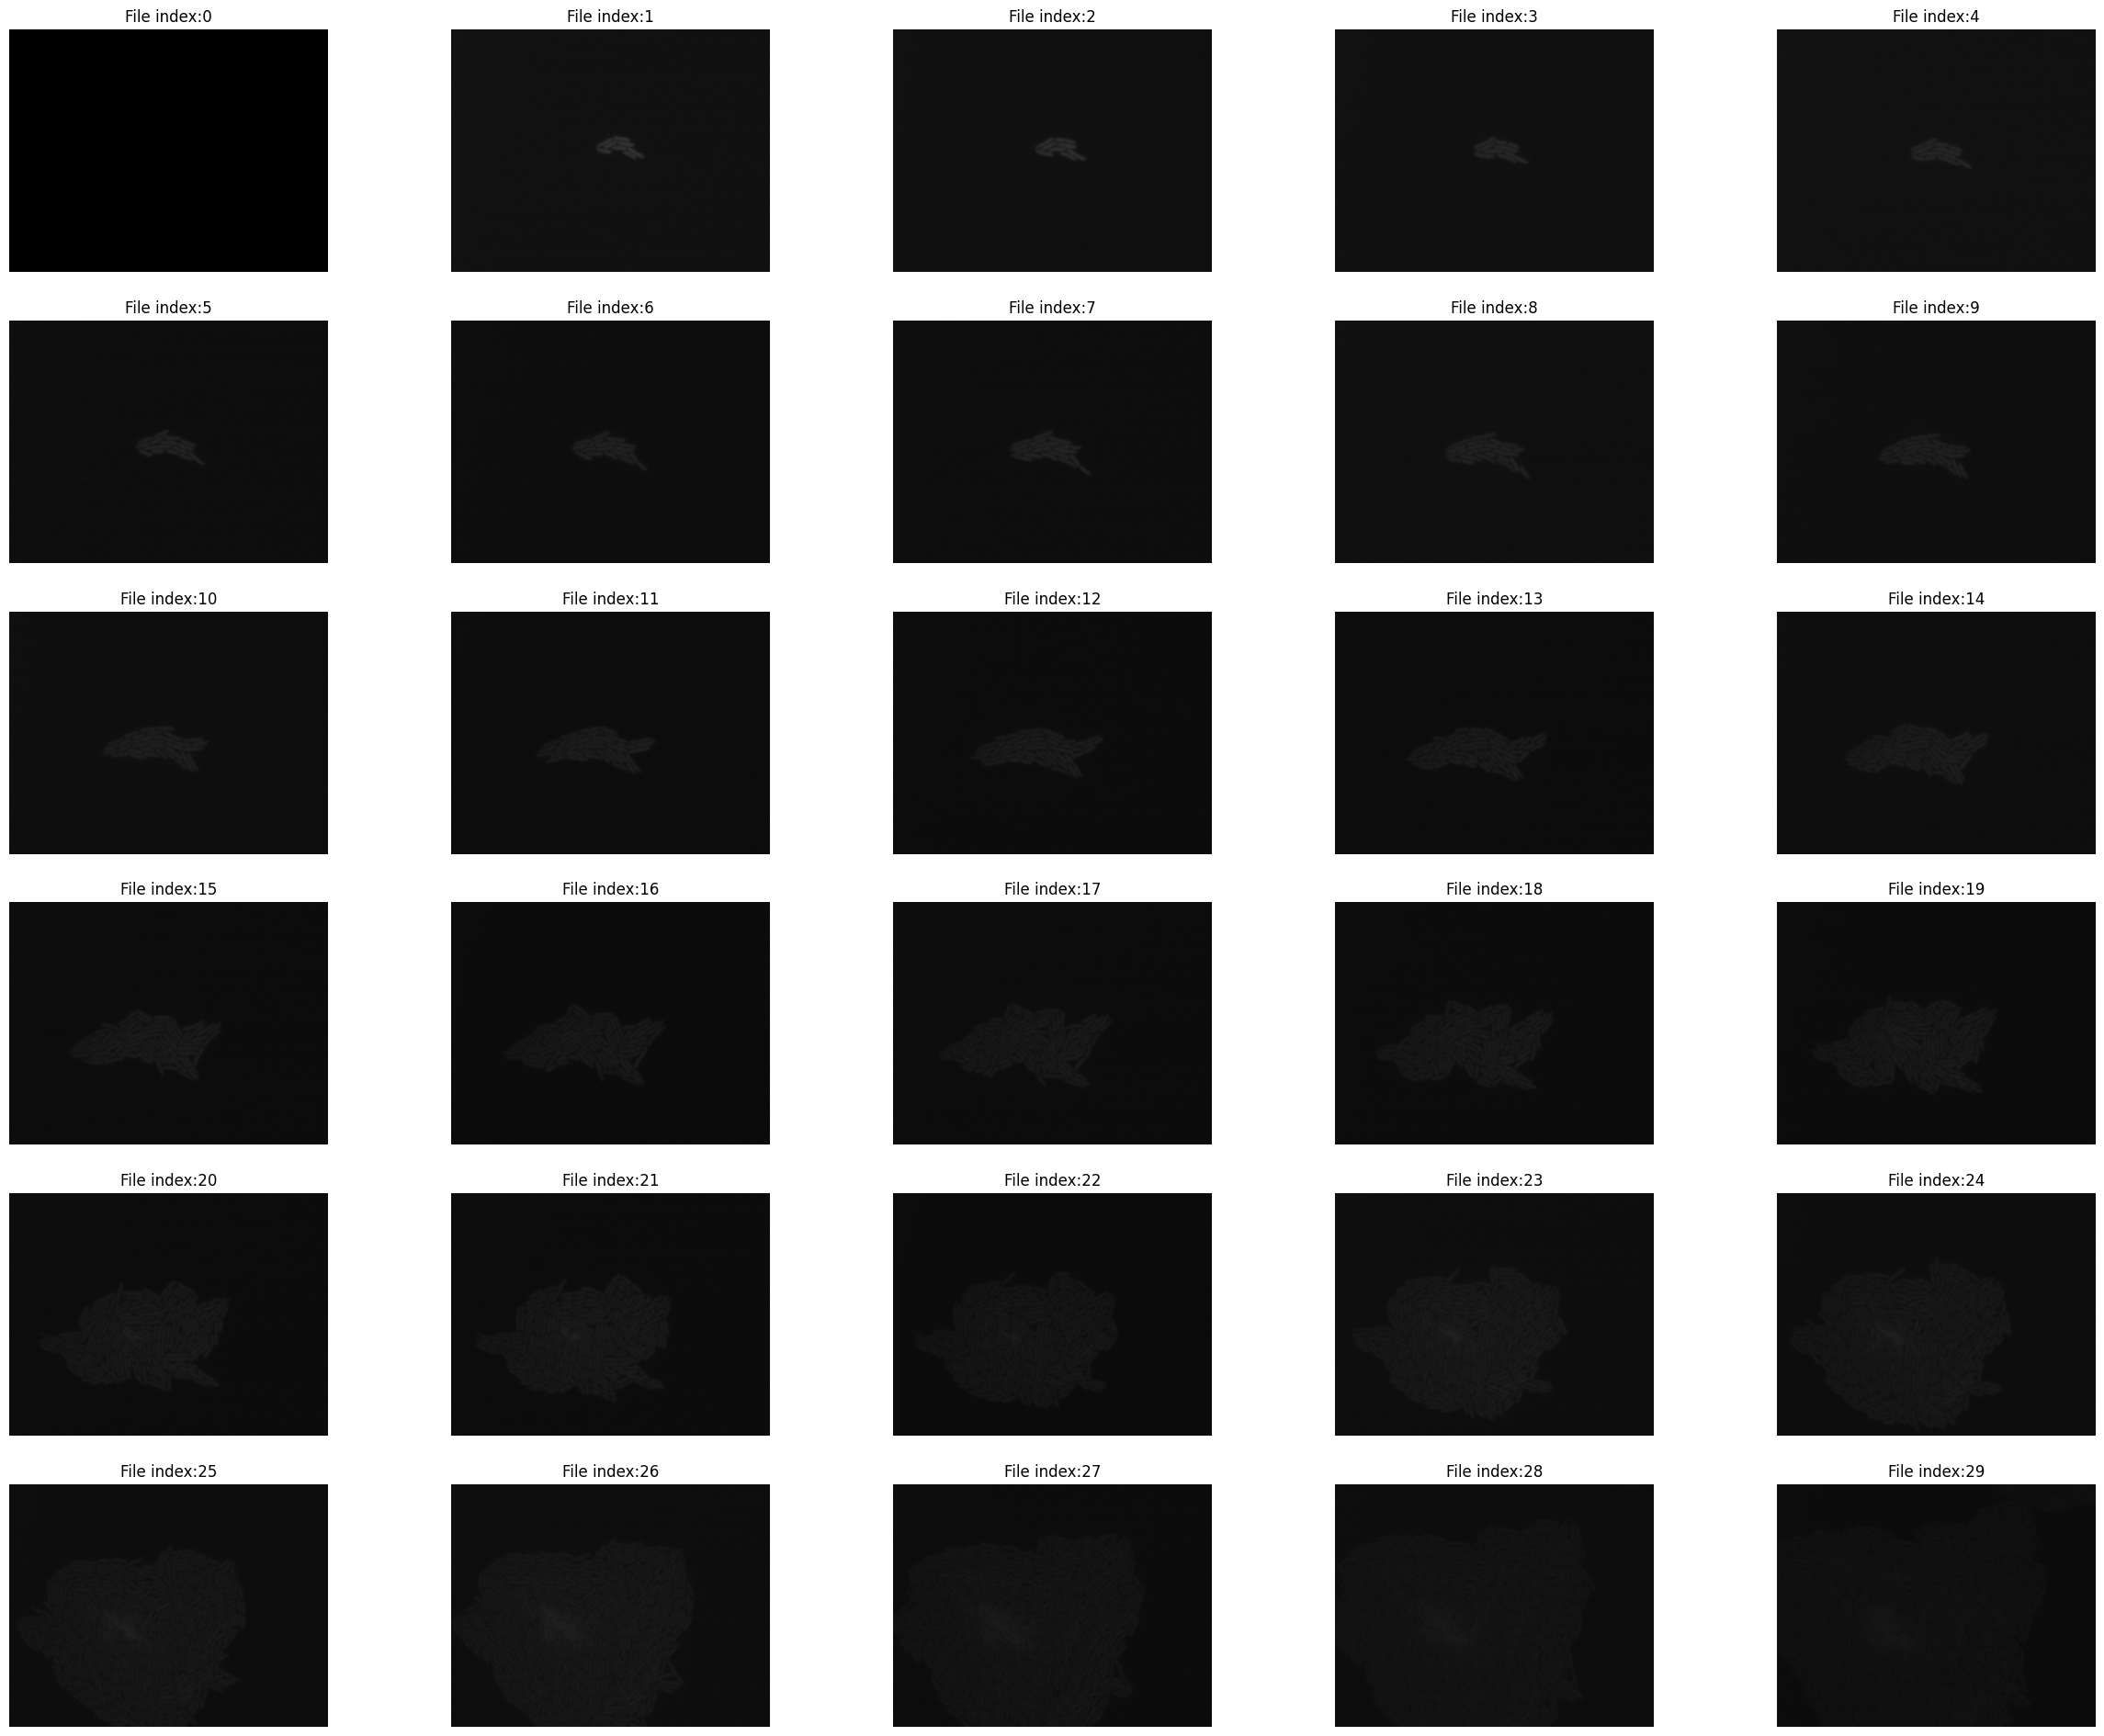

In [15]:
#show all images  in a 6 by 5 grid of size 30x24,  index as the title
fig, ax = plt.subplots(6,5, figsize=(30,24))
for i in range(6):
    for j in range(5):
        ax[i,j].imshow(skimage.io.imread(files[i*5+j]), cmap='gray')
        ax[i,j].set_title('File index:'+ str(i*5+j))
        ax[i,j].axis('off')

The result is not too good... we can only see a faint shadow in some of the images.

Let's have a closer look at image with index 15:

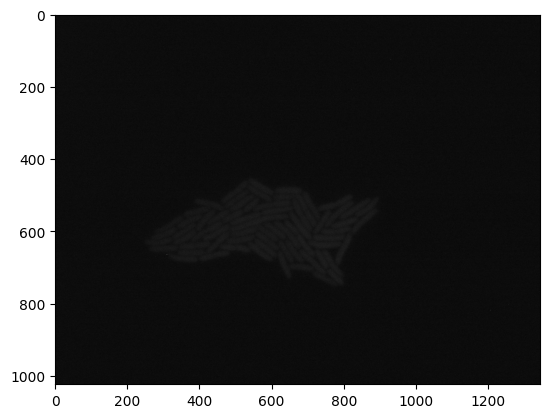

In [43]:
im = skimage.io.imread(files[15])
plt.imshow(im, cmap='gray')

Let's zoom to see only the center of the image, rows 550 to 650 and columns 400 to 500

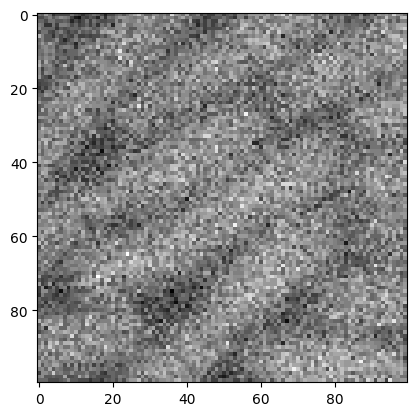

In [17]:
#zoom to center of the image, rows 550 to 650, columns 400 to 500
plt.imshow(im[550:650,400:500], cmap='gray')

And the top left 100x100 pixels

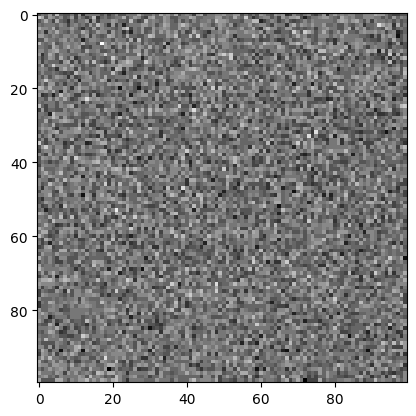

In [18]:
# zoom top left 100x100 pixels
plt.imshow(im[0:100,0:100], cmap='gray')

## QUESTION: What do you think is the problem with this image?
Explain in the next cell


The image suffers from salt and pepper, as a result of the low contrast of the image. The image is too dark and the contrast is too low, so the image is not clear enough to be able to see the bacteria.



## Let's try to improve the quality of the image
Let's apply the following 4x4 filter:

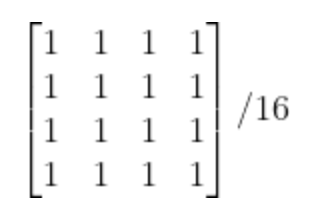

## QUESTION: What is this kind of filter name and what will we achieve applying it? 

**Answer:**
# The filter that us used is a low pass filter, it is used to reduce the noise in the image. This blurs or smoothens the picture. It is a 4x4 filter, so it will reduce the noise in the image by 4x4 times.


------------------------------------

Let's apply the filter specified above using ndimage.convolve

In [44]:
# apply the 4x4 filter using ndimage.convolve and store the result in a variable called filtered
filtered = [ndimage.convolve(skimage.io.imread(files[i]), np.ones((4,4))/16, mode='constant') for i in range(len(files))]

#select image with index 15
image_16 = filtered[15]

Let's see how the image looks like now

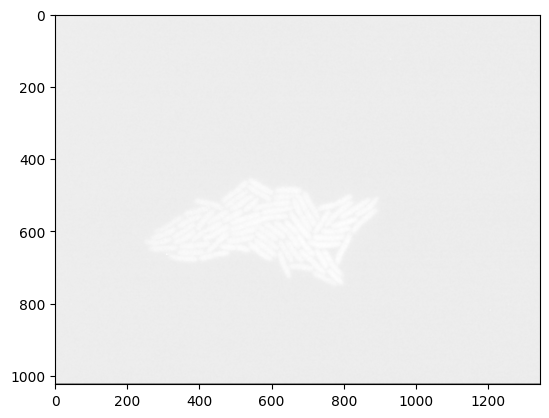

In [45]:
#show the image with index 15
plt.imshow(image_16, cmap='gray')

And repeat the zooms

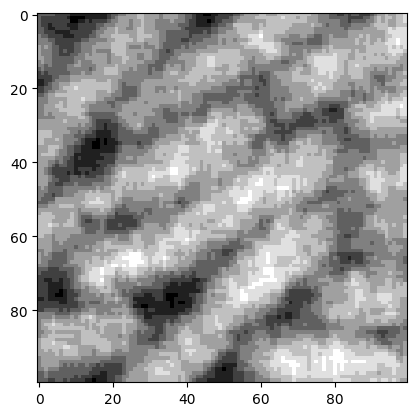

In [46]:
plt.imshow(image_16[550:650,400:500], cmap='gray')

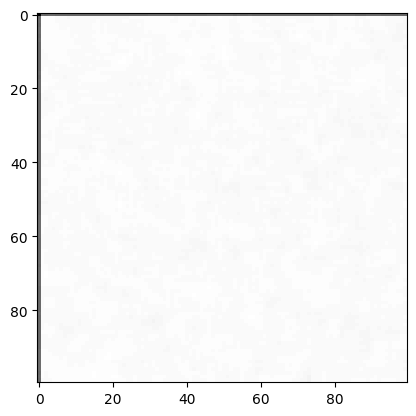

In [47]:
plt.imshow(image_16[0:100,0:100], cmap='gray')

To fullly separate the pixels from the bacteria from the background let's convert the image into a binary image and for that we need to find the thershold.

To do that let's plot the histogram of the image so we can identify hot to isolate the pixels with relevant information (use skimage.exposure.histogram).

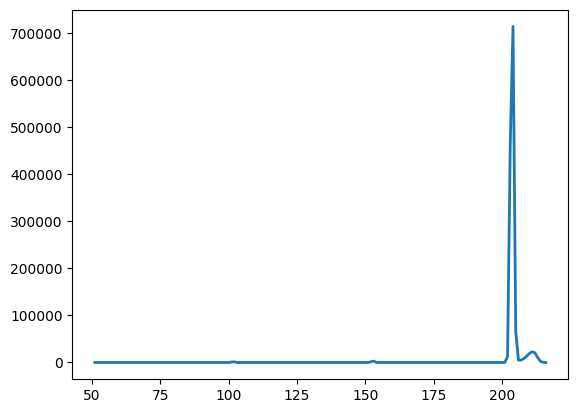

In [48]:
# plot the histogram of the image with index 15
from skimage.exposure import histogram
hist, hist_centers = histogram(image_16)
plt.plot(hist_centers, hist, lw=2)

There is a very tall peak that makes it difficult to read the lower values of the chart. To improve the chart understanding let's display it in logarithmic scale

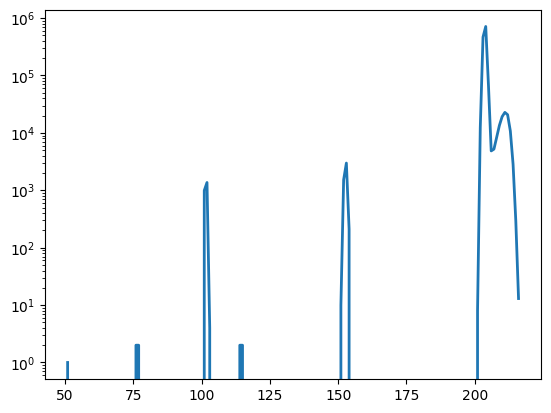

In [49]:
#make the distribution logarithmic
plt.plot(hist_centers, hist, lw=2)
plt.yscale('log')

It Looks like all information is in the last bins of the histogram. Let's visualize only the last 20 bins

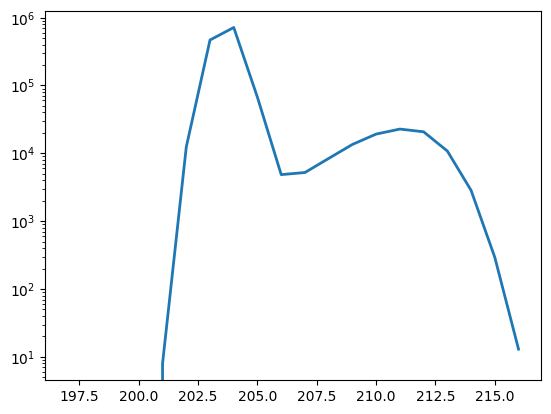

In [50]:
#visualize  the last 20 bins
plt.plot(hist_centers[-20:], hist[-20:], lw=2)
plt.yscale('log')

In this histogram we can see 2 peaks, one of them corresponds to the background noise (the higher peak) and the other are the pixels corresponding to the bacteria. We will use a threshold value of 205. Create a binary image (from the filtered image).

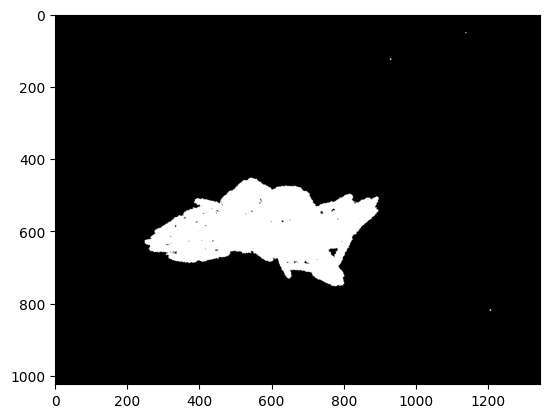

In [51]:
# create a binary image using a threshold value of 206
binary_im = image_16 > 206
plt.imshow(binary_im, cmap = 'gray')

Now let's create a function that transforms the images. The function should accept an image and should perform the convolution (filter) and create the binary image from it (with the threshold we have found before). The function shoud return the binary image.

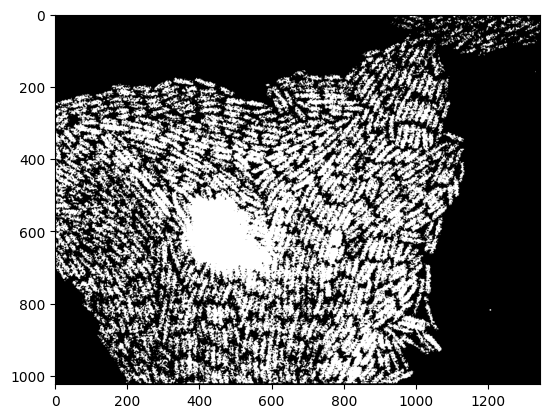

In [52]:
# create a function that transforms the images
def img_prepare(x):
    im_new = ndimage.convolve(x, np.ones((4,4))/16, mode='constant')
    binary_im = im_new > 206
    return binary_im

im_29 = skimage.io.imread(files[29])
im_prep = img_prepare(im_29)

plt.imshow(im_prep, cmap = 'gray')

Using this function let's display all images with the same grid we used before

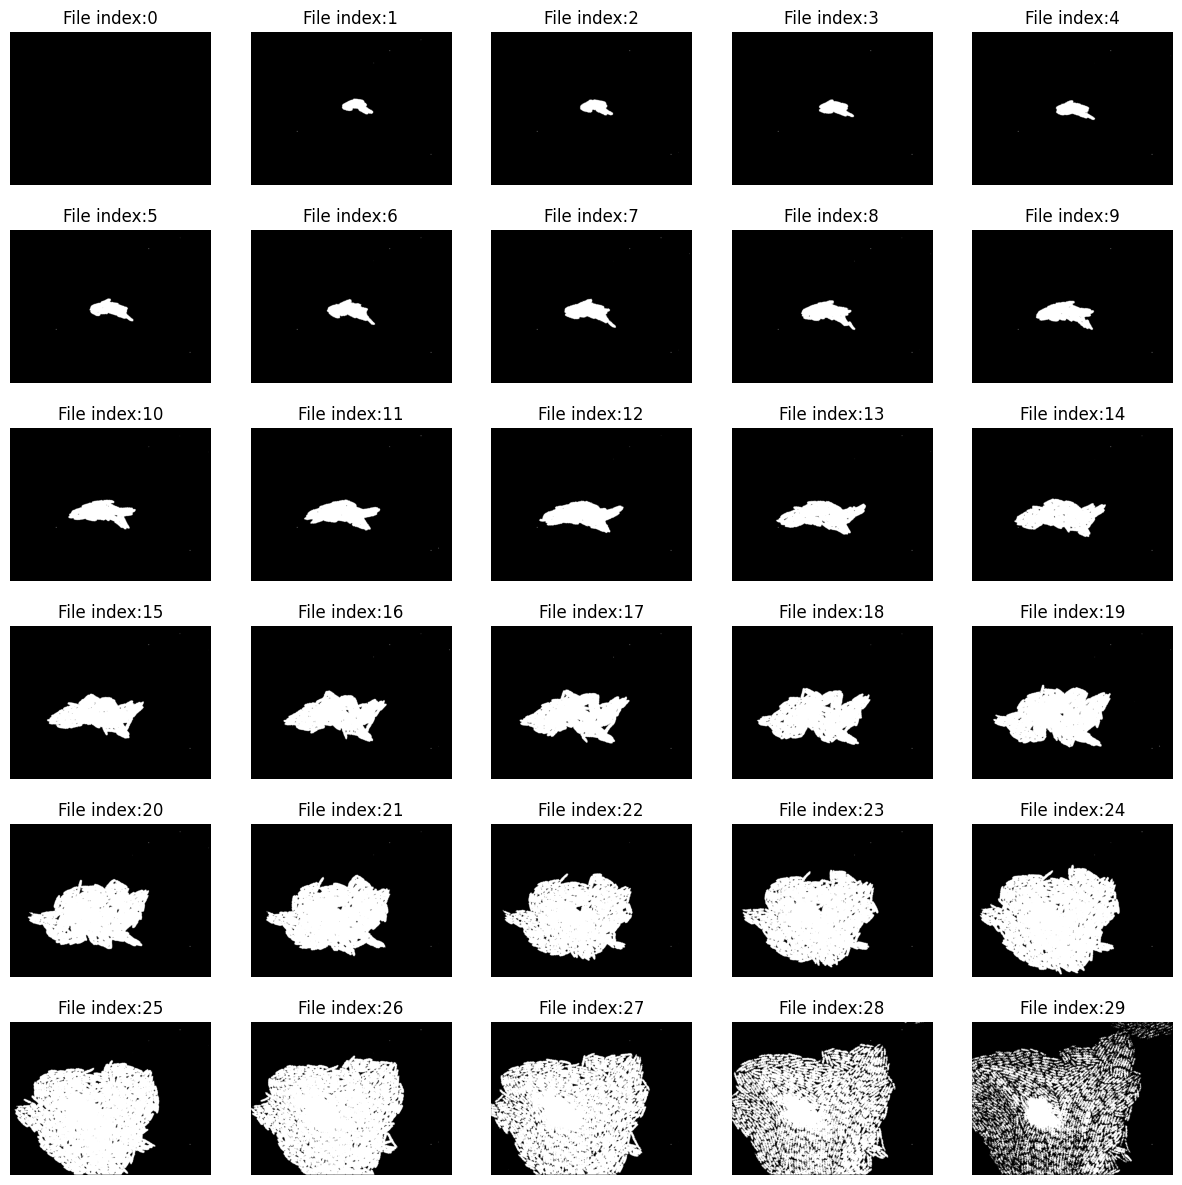

In [53]:
#show all images with the same 6 by 5 grid of size 30x24
fig, ax = plt.subplots(6,5, figsize=(15,15))
for i in range(6):
    for j in range(5):
        ax[i,j].imshow(img_prepare(skimage.io.imread(files[i*5+j])), cmap='gray')
        ax[i,j].set_title('File index:'+ str(i*5+j))
        ax[i,j].axis('off')

As we said at the beginning we are interested in calculating the doubling time, what is related to the growth rate. This means we are interested in knowing the size of the population in every image. This could be achieved counting the number of bacteria. This is not possible as with the images we have we can't efectively separate them in the image. Another method (considering we can assume they are all the same size) is to calculate the surface the bacteria population occupies. We can do this by just counting the active pixels in the binary image.

Create a function that accepts a binary image and returns the area in pixels of the bacteria

In [54]:
def bacteria_area(x):
    return np.sum(x)

im = skimage.io.imread(files[10])
im_prep = img_prepare(im)

print('The area in pixels of bacteria population in image 10 is: {}'.format(bacteria_area(im_prep)))

The area in pixels of bacteria population in image 10 is: 46047


Now let's calculate the ara for all images. 

Steps:

1.- Create a numpy array of the length of the files list initialized with 0s

2.- Loop through the files and for each of them 

    - Get the binary image using the function you created earlier
    - Calculate the area
    - Store it in the correpsonding position in the np array you created

In [55]:
# create a numpy array with 0s and let it loop through the files. get the binary image ,calculate the area and store this in bact_area_array
bact_area = np.zeros(len(files))

for i in range(len(files)):
    im = skimage.io.imread(files[i])
    im_prep = img_prepare(im)
    bact_area[i] = bacteria_area(im_prep)

bact_area_array = np.array(bact_area)

print(bact_area_array)

[     0.  12301.  14110.  15656.  18142.  21702.  25477.  29989.  34149.
  39442.  46047.  54889.  65098.  75270.  87020. 103761. 122149. 143421.
 167412. 199610. 230966. 272729. 312182. 368549. 433751. 504929. 570307.
 615519. 608579. 462243.]


Let's display these values in a chart. In the x axis we should have time (remember these images were taken with 5 minutes difference) and the area in pixels in the ye axis

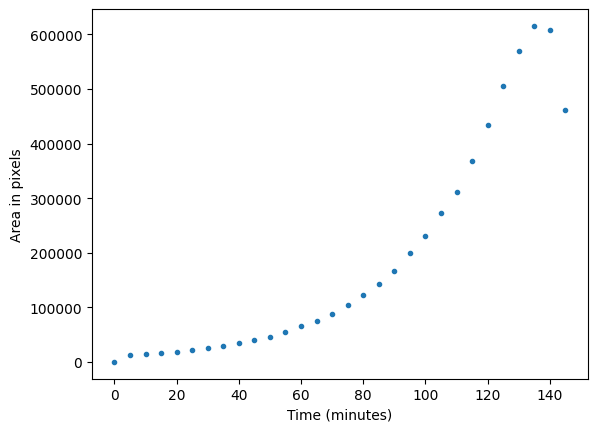

In [56]:
# display the values as dots in a chart. the values are all 5 minutes apart from each other and the area is the amount of pixels
plt.plot(np.arange(0,150,5), bact_area, ".")
plt.xlabel('Time (minutes)')
plt.ylabel('Area in pixels')
plt.show()

Good!! We are observing the exponential growth we were expecting!! There seems to be an issue with the last 3 images and also the first one is not useful for our goal as it is empty. Let's discard them! 

Let's create another array excluding the last 3 images (outliers) and the first one.

In [57]:
# excluding the last 3 and the first image
bact_area_wo = bact_area[1:-3]
bact_area_wo

array([ 12301.,  14110.,  15656.,  18142.,  21702.,  25477.,  29989.,
        34149.,  39442.,  46047.,  54889.,  65098.,  75270.,  87020.,
       103761., 122149., 143421., 167412., 199610., 230966., 272729.,
       312182., 368549., 433751., 504929., 570307.])

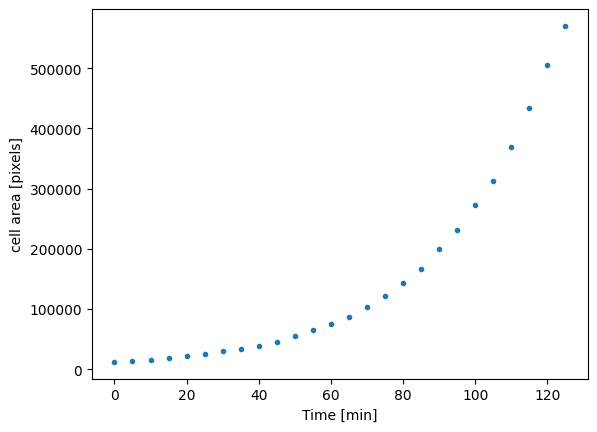

In [58]:
plt.plot(np.arange(0,130, 5), bact_area_wo, ".")
plt.xlabel('Time [min]')
plt.ylabel('cell area [pixels]')
plt.show()

Now that we have the empirical growth every five minutes we need to find the doubling time. To do this we need to do several things.

First find a value of r in the formula we saw at the beginning that adjusts this data best.

This is the formula as a reminder:

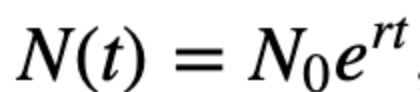

N0 is the size (in our case size in pixels) of the population at the beginning (bact_area_wo[0]).

As you can see below there is one value of r for which this formula will match our data almost perfectly and others that will have bigger errors:

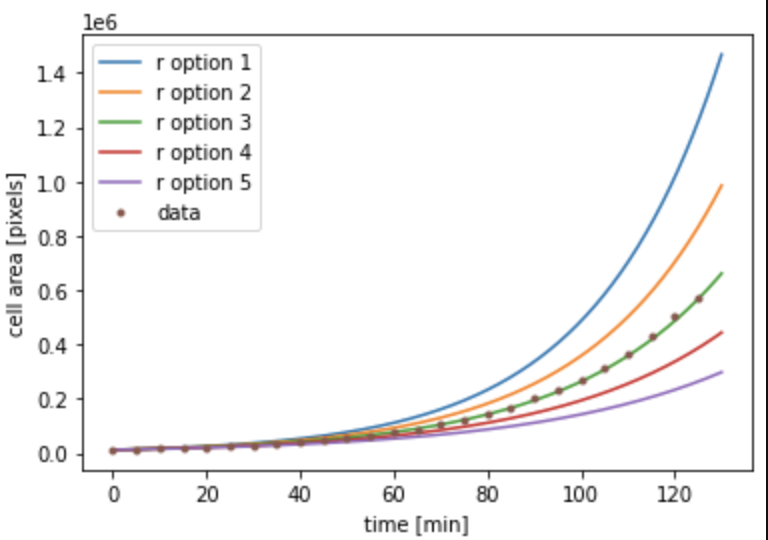

Finding this optimum r in data with an exponential behaviour is the job of a logistic regression. But this time we will do it with our own code so we understand the intuitions.

We first need a formula to calculate the error involved for a particular value of r. We will use this one:

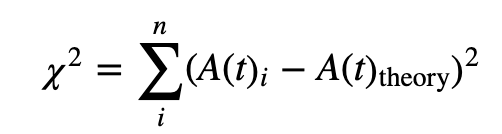

This is often called the Chi-squared statistic. n  is the number of data points and A(t)theory is the expected cellular area at time t, given by our model of exponential growth (the abouve formula) for a given value of r. A(t) is the data we have obtained from the images. We will try for 200 values of r between 0 and 0.1. For each of the values of r we will calculate the theoretical value of the area at each time an image has been taken, and apply the chi error formula. We store the chi errors for the 200 values of r and we will use the value of r with the lowest index. 

1.- Create an r_range numpy array with 200 values between 0 and 0.1 (tip: linspace)

In [59]:
r_range = np.linspace(0,0.1,200)
r_range.shape

(200,)

2.- Create a numpy array initialized with 0, with the same size as the above r_range where we will store the error for each value of r. Call it chi_sq.

In [60]:
chi_sq = np.zeros(len(r_range))
chi_sq.shape

(200,)

3.- Loop through the values of r in r_range and for each value of r do_
    - Calculate the theoretical value of the area (theo) using the N(t) formula. 
    - Calculate and store the chi squared error for that value of r

In [61]:
time_range = np.arange(0, len(bact_area_wo)) * 5
# Iterate through each possible growth rate. 
for i in range(len(r_range)):
    # Compute the theoretical value at each time point. 
    theo = bact_area_wo[0] * np.exp(r_range[i] * time_range)
    
    # Compute the sum squared residuals. 
    chi_sq[i] = np.sum((bact_area_wo - theo)**2)

In [62]:
chi_sq

array([1.17804512e+12, 1.17337481e+12, 1.16845996e+12, 1.16328783e+12,
       1.15784509e+12, 1.15211774e+12, 1.14609115e+12, 1.13975001e+12,
       1.13307828e+12, 1.12605925e+12, 1.11867543e+12, 1.11090862e+12,
       1.10273982e+12, 1.09414928e+12, 1.08511645e+12, 1.07562002e+12,
       1.06563789e+12, 1.05514719e+12, 1.04412428e+12, 1.03254481e+12,
       1.02038374e+12, 1.00761537e+12, 9.94213403e+11, 9.80151044e+11,
       9.65401071e+11, 9.49935955e+11, 9.33727998e+11, 9.16749497e+11,
       8.98972941e+11, 8.80371240e+11, 8.60918002e+11, 8.40587851e+11,
       8.19356799e+11, 7.97202679e+11, 7.74105653e+11, 7.50048789e+11,
       7.25018737e+11, 6.99006498e+11, 6.72008321e+11, 6.44026718e+11,
       6.15071639e+11, 5.85161808e+11, 5.54326259e+11, 5.22606084e+11,
       4.90056427e+11, 4.56748758e+11, 4.22773467e+11, 3.88242808e+11,
       3.53294251e+11, 3.18094290e+11, 2.82842772e+11, 2.47777801e+11,
       2.13181314e+11, 1.79385394e+11, 1.46779434e+11, 1.15818247e+11,
      

Let's plot now the error for each value of r

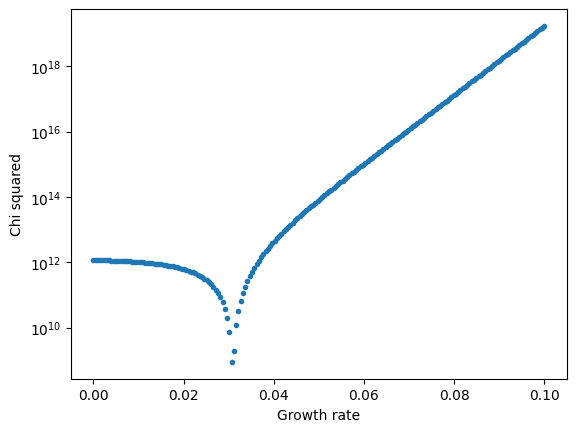

In [63]:
# Plot the chisq statistic using a logaritmic scale for the y axis
plt.plot(r_range, chi_sq, ".")
plt.xlabel('Growth rate')
plt.ylabel('Chi squared')
plt.yscale('log')

We can easily see there is a clear minimum (a valu of r with the lowest error). Let's identify this value, finding the index with the minimum value (np.argmin) and then geting the value at this index.

In [64]:
min_chi_sq = np.argmin(chi_sq)
r_opt = r_range[min_chi_sq]
print('The index at the minimum is', r_opt, ' min^-1')

The index at the minimum is 0.030653266331658293  min^-1


Let's display in a chart the formula with the calculated value of r and the area obtained from the images.

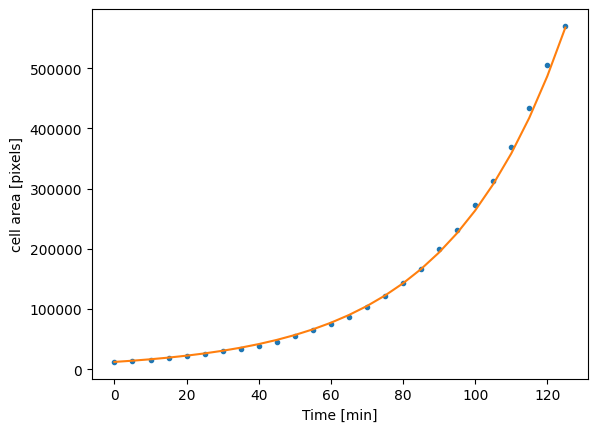

In [65]:
# Compute the best fit
theo = bact_area_wo[0] * np.exp(r_opt * time_range)
#plot data and the best fit
plt.plot(time_range, bact_area_wo, ".")
plt.plot(time_range, theo, "-")
plt.xlabel('Time [min]')
plt.ylabel('cell area [pixels]')
plt.show()

Good!! We have a great fit!! now we just need to find the doubling time.

We just need to apply the formula:

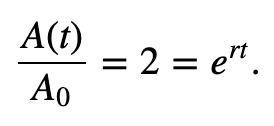

and isolate t. 

So te will be the result of this:

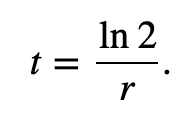

Let's calculate it. (remember that in numpy the natural logarithm is the function np.log)

In [66]:
# Calculate the doubling time using the formula
doubling_time = np.log(2)/r_opt
print('The doubling time is', doubling_time, 'minutes')

The doubling time is 22.61250638220149 minutes
